## BE Data Science

In [83]:
pip install seaborn pandas

Note: you may need to restart the kernel to use updated packages.


### Chargement des données brutes en mémoire


In [84]:
import pandas as pd
import csv

def read_ds(ds_name: str):
    rows = []
    
    with open(ds_name, "r", encoding="utf-8") as f:
        lines = f.readlines()
    
    sample_line = lines[0]
    sniffer = csv.Sniffer()
    try:
        dialect = sniffer.sniff(sample_line)
        delim = dialect.delimiter
    except csv.Error:
        delim = ","   
    
    for line in lines:
        line = line.strip()
        if not line:
            continue  
        
        parts = line.split(delim)
        rows.append(parts)
    

    max_len = max(len(r) for r in rows)
    
   
    columns = ["util", "navigateur"] + [f"action_{i}" for i in range(1, max_len - 1)]

    normalized_rows = [r + [None]*(max_len - len(r)) for r in rows]
    
    df = pd.DataFrame(normalized_rows, columns=columns)
    return df



In [85]:
features_train = read_ds("train.csv")
features_test = read_ds("test.csv")
features_train.shape, features_test.shape

((3279, 14470), (324, 7726))

In [86]:
features_train.head()

,util,navigateur,action_1,action_2,action_3,action_4,action_5,action_6,action_7,action_8,...,action_14459,action_14460,action_14461,action_14462,action_14463,action_14464,action_14465,action_14466,action_14467,action_14468
0,nuh,Firefox,Création d'un écran(infologic.core.accueil.Acc...,Affichage d'une dialogue,Exécution d'un bouton,Fermeture d'une dialogue,Affichage d'une dialogue,Exécution d'un bouton,Fermeture d'une dialogue,Création d'un écran(infologic.core.gui.control...,...,None,None,None,None,None,None,None,None,None,None
1,muz,Google Chrome,Création d'un écran(infologic.core.gui.control...,Création d'un écran(infologic.core.gui.control...,t5,Sélection d’un onglet(infologic.orga.modules.O...,t10,Exécution d'un bouton,t15,Sélection d’un onglet,...,None,None,None,None,None,None,None,None,None,None
2,zrx,Microsoft Edge,Affichage d'une dialogue(infologic.core.gui.co...,Exécution d'un bouton,Chainage,Fermeture d'une dialogue,Affichage d'une dialogue(infologic.acti.module...,Clic sur une grille d'historique de recherche,Raccourci,Fermeture d'une dialogue,...,None,None,None,None,None,None,None,None,None,None
3,pou,Firefox,Création d'un écran(infologic.core.gui.control...,t5,Exécution d'un bouton(MAINT),Affichage d'une dialogue,Fermeture d'une dialogue,Double-clic,Exécution d'un bouton,Lancement d'une stat(infologic.core.gui.contro...,...,None,None,None,None,None,None,None,None,None,None
4,ald,Google Chrome,Affichage d'une dialogue(infologic.acti.module...,t5,Exécution d'un bouton,Fermeture d'une dialogue,t10,Entrée en saisie dans un formulaire,t10,Affichage d'une dialogue,...,None,None,None,None,None,None,None,None,None,None


### Première analyse de ces données

In [87]:
features_train.iloc[:, :20].head()

,util,navigateur,action_1,action_2,action_3,action_4,action_5,action_6,action_7,action_8,action_9,action_10,action_11,action_12,action_13,action_14,action_15,action_16,action_17,action_18
0,nuh,Firefox,Création d'un écran(infologic.core.accueil.Acc...,Affichage d'une dialogue,Exécution d'un bouton,Fermeture d'une dialogue,Affichage d'une dialogue,Exécution d'un bouton,Fermeture d'une dialogue,Création d'un écran(infologic.core.gui.control...,t5,Exécution d'un bouton(MAINT),Affichage d'une dialogue,Fermeture d'une dialogue,Double-clic,Exécution d'un bouton,Lancement d'une stat(infologic.core.gui.contro...,Affichage d'un toast,Lancement d'une stat(infologic.core.gui.contro...,t10
1,muz,Google Chrome,Création d'un écran(infologic.core.gui.control...,Création d'un écran(infologic.core.gui.control...,t5,Sélection d’un onglet(infologic.orga.modules.O...,t10,Exécution d'un bouton,t15,Sélection d’un onglet,Exécution d'un bouton,Chainage,t20,Sélection d’un onglet(MAJ),t25,Sélection d'un écran(infologic.orga.modules.OR...,Sélection d'un écran,Exécution d'un bouton,Chainage,t30
2,zrx,Microsoft Edge,Affichage d'une dialogue(infologic.core.gui.co...,Exécution d'un bouton,Chainage,Fermeture d'une dialogue,Affichage d'une dialogue(infologic.acti.module...,Clic sur une grille d'historique de recherche,Raccourci,Fermeture d'une dialogue,Création d'un écran,t5,Clic sur une grille d'historique de recherche,Raccourci,Exécution d'un bouton,Affichage d'une dialogue,t10,Clic sur une grille d'historique de recherche,Raccourci,Exécution d'un bouton
3,pou,Firefox,Création d'un écran(infologic.core.gui.control...,t5,Exécution d'un bouton(MAINT),Affichage d'une dialogue,Fermeture d'une dialogue,Double-clic,Exécution d'un bouton,Lancement d'une stat(infologic.core.gui.contro...,t10,Filtrage / Tri(MAINT),Clic sur une grille d'historique de recherche,Sélection d'un flag,Filtrage / Tri,t15,Affichage d'une dialogue,Clic sur une grille d'historique de recherche,Affichage d'une dialogue,t20
4,ald,Google Chrome,Affichage d'une dialogue(infologic.acti.module...,t5,Exécution d'un bouton,Fermeture d'une dialogue,t10,Entrée en saisie dans un formulaire,t10,Affichage d'une dialogue,t15,Fermeture d'une dialogue,t20,Sélection d'un écran(infologic.crm.modules.CRM...,Exécution d'un bouton,Action de table,Affichage d'un toast,Affichage d'une dialogue,Affichage d'une dialogue,Exécution d'un bouton


In [88]:
number_unique_navigators = list(features_train['navigateur'].value_counts())
print(len(number_unique_navigators))

4


Let's now define functions that we might use later to see the graphs.

In [89]:
import warnings
from IPython.display import display, Markdown

# décorateurs utilitaires pour supprimer les avertissements de la sortie et imprimer un cadre de données dans un tableau Markdown.
def ignore_warnings(f):
    def _f(*args, **kwargs):
        warnings.filterwarnings('ignore')
        v = f(*args, **kwargs)
        warnings.filterwarnings('default')
        return v
    return _f

# affiche un DataFrame Pandas sous forme de tableau Markdown dans un notebook Jupyter.
def markdown_table(headNtail=False, use_index=True, title=None, precision=2):
    def _get_value(val): return str(round(val, precision) if isinstance(val, float) else val)
    def _format_row(row): 
        row_str = ""
        if use_index: row_str += f"|{str(row.name)}"
        for value in row.values: row_str += f"| {_get_value(value)}"
        return row_str + "|"
    def _get_str(df):
        return "\n".join(df.apply(_format_row, axis=1))
    def _deco(f):
        def _f(*args, **kwargs):
            df = f(*args, **kwargs)
            _str = f"#### {title}\n" if title else ""
            header = ([str(df.index.name)] if use_index else []) + df.columns.astype(str).to_list() 
            _str += f"|{'|'.join(header)}|" + f"\n|{'--|'*len(header)}\n" if header else None
            if headNtail:
                _str += _get_str(df.head())
                _str += "\n|...|...|\n"
                _str += _get_str(df.tail())
            else:
                _str += _get_str(df)
            display(Markdown(_str))
        return _f
    return _deco

# fonction utilitaire permettant d'obtenir une grille graphique à partir d'un nombre arbitraire de lignes/colonnes ou de données.
def get_grid(n, n_row=None, n_col=None, titles=None, figsize=(10, 8), wspace=.5, hspace=.5, **kwargs):
    if n_row: n_col= n_col or math.floor(n/n_row)
    elif n_col: n_row= n_row or math.ceil(n/n_col)
    else:
        n_row = math.ceil(math.sqrt(n))
        n_col = math.floor(n/n_row)
    fig, axs = plt.subplots(n_row, n_col, figsize=figsize, **kwargs)
    plt.subplots_adjust(hspace=hspace, wspace=wspace)
    if titles is not None:
        for ax, title in zip(axs.flat, titles): ax.set_title(title)
    return fig, axs

In [90]:
features_train["util"]


0       nuh
1       muz
2       zrx
3       pou
4       ald
       ... 
3274    muz
3275    cjr
3276    fuz
3277    cjr
3278    fwf
Name: util, Length: 3279, dtype: object

In [91]:
user_nav_grouped = features_train.groupby("util")["navigateur"].apply(list)
print(user_nav_grouped)

util
aho    [Google Chrome, Google Chrome, Google Chrome, ...
ajo    [Firefox, Firefox, Firefox, Firefox, Firefox, ...
akx    [Google Chrome, Google Chrome, Google Chrome, ...
ald    [Google Chrome, Google Chrome, Google Chrome, ...
ats    [Firefox, Firefox, Firefox, Firefox, Firefox, ...
                             ...                        
zqs    [Microsoft Edge, Microsoft Edge, Microsoft Edg...
zro    [Firefox, Firefox, Firefox, Firefox, Firefox, ...
zrx    [Microsoft Edge, Microsoft Edge, Microsoft Edg...
zus    [Firefox, Firefox, Firefox, Firefox, Firefox, ...
zyk    [Google Chrome, Google Chrome, Google Chrome, ...
Name: navigateur, Length: 247, dtype: object


In [92]:
@markdown_table(title="Navigateur par utilisateur", headNtail=True)
def browsers_per_player(df):
    user_nav_grouped = df.groupby("util")["navigateur"].apply(list).reset_index()
    return user_nav_grouped

browser_user_df = browsers_per_player(features_train)



#### Navigateur par utilisateur
|None|util|navigateur|
|--|--|--|
|0| aho| ['Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome']|
|1| ajo| ['Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox']|
|2| akx| ['Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome']|
|3| ald| ['Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome']|
|4| ats| ['Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox']|
|...|...|
|242| zqs| ['Microsoft Edge', 'Microsoft Edge', 'Microsoft Edge', 'Microsoft Edge', 'Microsoft Edge', 'Microsoft Edge', 'Microsoft Edge', 'Microsoft Edge', 'Microsoft Edge', 'Microsoft Edge', 'Microsoft Edge', 'Microsoft Edge', 'Microsoft Edge', 'Microsoft Edge', 'Microsoft Edge', 'Microsoft Edge']|
|243| zro| ['Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox']|
|244| zrx| ['Microsoft Edge', 'Microsoft Edge', 'Microsoft Edge', 'Microsoft Edge', 'Microsoft Edge', 'Microsoft Edge', 'Microsoft Edge', 'Microsoft Edge', 'Microsoft Edge', 'Microsoft Edge', 'Microsoft Edge', 'Microsoft Edge']|
|245| zus| ['Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox', 'Firefox']|
|246| zyk| ['Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome', 'Google Chrome']|

We can observe that the user is always using the same browser to do the actions. Let's see if some users still used several browsers.

In [93]:
user_nav_grouped = features_train.groupby("util")["navigateur"].apply(list).reset_index()


user_nav_grouped["unique_browsers_count"] = user_nav_grouped["navigateur"].apply(lambda x: len(set(x)))
filtered_users = user_nav_grouped[user_nav_grouped["unique_browsers_count"] > 1]


filtered_users = filtered_users[["util", "navigateur"]]

filtered_users.head()

,util,navigateur


There is absolutely no user that is using more than one browser. The users can be classified in different categories by the browsers they use. If this is then linked to any activity we can train on the dataset on those features.

In [94]:
@markdown_table(headNtail=True, title="Stats: Y distribution")
def get_Y_stats(df,key):
    y_counts = df[key].value_counts().reset_index()
    y_counts.columns = ["Y_value", "count"]
    return y_counts

get_Y_stats(features_train,"util")


#### Stats: Y distribution
|None|Y_value|count|
|--|--|--|
|0| skm| 75|
|1| slq| 71|
|2| cjr| 46|
|3| flj| 42|
|4| hjs| 37|
|...|...|
|242| rff| 4|
|243| bez| 4|
|244| crn| 4|
|245| azn| 4|
|246| fyg| 4|

### Construction de caractéristiques

#### Traitements préliminaires

Let's inspect if there is any outliers in our dataset. To do so, we need to check the occurences of actions and remove the ones that occur the less. 

We first check what are the actions and we want to see if there are any actions that are out of the formal ones. 

In [95]:
def get_action_counts(df):
    action_cols = [col for col in df.columns if col.startswith("action_")]
    all_actions = df[action_cols].values.ravel()
    all_actions_series = pd.Series(all_actions).dropna()
    action_counts = all_actions_series.value_counts()
    
    return action_counts

action_counts = get_action_counts(features_train)

action_counts_df = action_counts.reset_index()
action_counts_df.columns = ["action", "count"]
action_counts_df.head()



,action,count
0,Exécution d'un bouton,265323
1,Saisie dans un champ,127325
2,Lancement d'une action générique,115069
3,Fermeture d'une dialogue,90338
4,Exécution d'un bouton1,89331


In [96]:
action_counts_df.tail()

,action,count
9440,Sélection d'un écran<DEF_03/24>$MAJ$,1
9441,Filtrage / Tri(infologic.acti.modules.AT_ACTIV...,1
9442,Dissimulation d'une arborescence(infologic.cor...,1
9443,Exécution d'un bouton<Défaut>1,1
9444,Chainage(MAINT)$EDI$,1


We can see that there are actions that occure only 1 time which is a very odd data and we don't want to train on those values. We are opting for a frequency-based filtering approach. We chose to keep 99% of the total informations in the df. 

In [97]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import re

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings("ignore")

In [107]:
def extract_features(row):
    feats = {}
    actions = row.iloc[2:].dropna().tolist()
    actions = [a for a in actions if isinstance(a, str)]

    feats["n_actions"] = len(actions)
    feats["n_unique_actions"] = len(set(actions))
    feats["repeat_ratio"] = 1 - feats["n_unique_actions"] / feats["n_actions"] if feats["n_actions"] > 0 else 0

    feats["t_count"] = sum(1 for a in actions if a.startswith("t"))

    feats["modif_ratio"] = sum(1 for a in actions if a.endswith("1")) / feats["n_actions"] if feats["n_actions"] > 0 else 0

    times = [int(a[1:]) for a in actions if a.startswith("t") and a[1:].isdigit()]
    feats["max_time"] = max(times) if times else 0

    ecrans = [m.group(1) for a in actions for m in [pattern_ecran.search(a)] if m]
    confs = [m.group(1) for a in actions for m in [pattern_conf.search(a)] if m]
    chaines = [m.group(1) for a in actions for m in [pattern_chaine.search(a)] if m]

    feats["top_screen"] = Counter(ecrans).most_common(1)[0][0] if ecrans else "None"
    feats["top_conf"] = Counter(confs).most_common(1)[0][0] if confs else "None"
    feats["top_chain"] = Counter(chaines).most_common(1)[0][0] if chaines else "None"

    feats["navigateur"] = row["navigateur"]

    if "util" in row:
        feats["util"] = row["util"]

    return feats


In [108]:
train_features = pd.DataFrame([extract_features(r) for _, r in features_train.iterrows()])
test_features = pd.DataFrame([extract_features(r) for _, r in features_test.iterrows()])


Préparation des données et normalisation

In [109]:

train_features["util"] = pd.Categorical(train_features["util"])
y = train_features["util"].cat.codes

X = train_features.drop(columns=["util"])

X = pd.get_dummies(X, columns=["navigateur", "top_screen", "top_conf", "top_chain"], dummy_na=True)
X_test = pd.get_dummies(test_features, columns=["navigateur", "top_screen", "top_conf", "top_chain"], dummy_na=True)

X_test = X_test.reindex(columns=X.columns, fill_value=0)

scaler = StandardScaler()
num_cols = ["n_actions", "t_count", "modif_ratio"]
X[num_cols] = scaler.fit_transform(X[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)

X_train shape: (2623, 303)


Accuracy : 0.4634
Macro-F1 : 0.3701
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.25      0.33      0.29         3
           2       0.17      0.33      0.22         3
           3       1.00      0.33      0.50         3
           4       0.00      0.00      0.00         2
           5       0.67      0.67      0.67         3
           6       0.00      0.00      0.00         1
           7       1.00      0.50      0.67         2
           8       0.00      0.00      0.00         2
           9       0.50      1.00      0.67         1
          10       0.00      0.00      0.00         3
          11       0.33      0.20      0.25         5
          12       0.17      0.50      0.25         2
          13       0.00      0.00      0.00         2
          14       0.50      0.50      0.50         2
          15       0.50      0.67      0.57         3
          16       0.50      0.33      0.40  

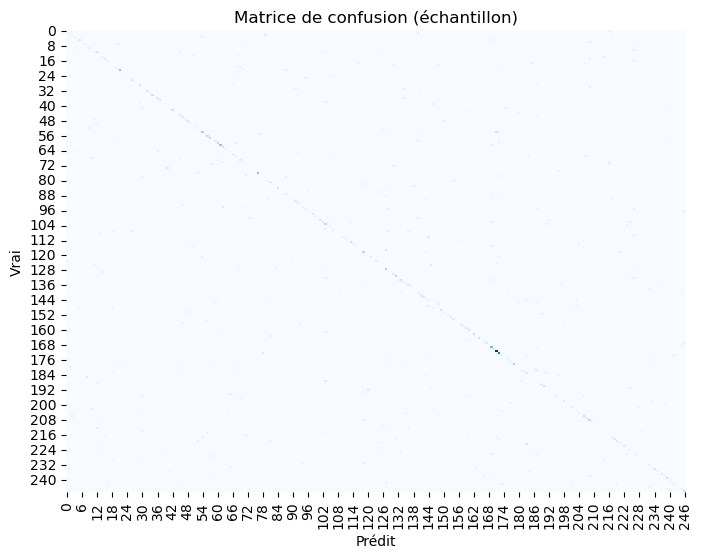

In [110]:
clf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
clf.fit(X_train, y_train)

# Prédictions
y_pred = clf.predict(X_val)

# Évaluation
acc = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred, average="macro")
print(f"Accuracy : {acc:.4f}")
print(f"Macro-F1 : {f1:.4f}")
print(classification_report(y_val, y_pred)[:1000])

# Matrice de confusion (pour les classes principales)
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_val, y_pred), cmap="Blues", cbar=False)
plt.title("Matrice de confusion (échantillon)")
plt.xlabel("Prédit")
plt.ylabel("Vrai")
plt.show()

In [111]:
test_preds = clf.predict(X_test)


In [106]:
test_preds = pd.Categorical.from_codes(test_preds, train_features["util"].cat.categories)

submission_df = pd.DataFrame(test_preds, columns=["prediction"])
submission_df.index.name = "RowId"
submission_df.index += 1  
submission_df.head()

,prediction
RowId,
1,skm
2,prb
3,czi
4,psg
5,sfi
